In [1]:
from src.explainer import VGGClassifierExplainer
from src.net import VggNetwork
from src.utils import load_checkpoint
from src.data import CelebaData
from src.explainer.misc_functions import to_image
import matplotlib.pyplot as plt
import torch

In [2]:
net = VggNetwork(out=2)
load_checkpoint(net, "0-net.pth")

Checkpoint loaded: {'epoch': 0} 


{'epoch': 0}

In [3]:
val_data = CelebaData("data/val.csv")
image, label = val_data[300]
torch.softmax(net(image.unsqueeze(0)), 1)

tensor([[0.0028, 0.9972]], grad_fn=<SoftmaxBackward>)

In [4]:
label

tensor([1])

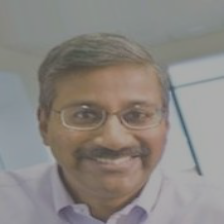

In [5]:
to_image(image)

In [9]:
image.requires_grad = True

In [6]:
explainer = VGGClassifierExplainer(net)

In [7]:
heatmap, him = explainer.heatmap_visualisation(image, target_class=1)

In [10]:
gradient = explainer.smooth_gradient_visualisation(image)

In [11]:
filter_patterns = explainer.filter_pattern_visualisation()

In [12]:
filter_activaiton = explainer.filter_activation_visualisation(image)